<a href="https://colab.research.google.com/github/Racheus/ME3221-Testing-principles-and-techniques/blob/main/PRP43_DCNN86_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=False)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

In [ ]:
train_folder_path = "/content/drive/MyDrive/PRP43/PureCWTImage"

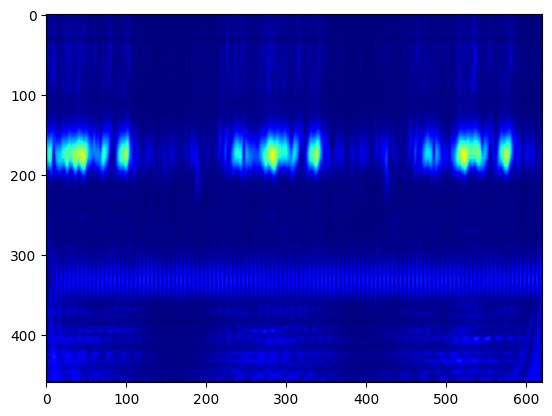

In [ ]:
file_path = train_folder_path+'/CWTimg0_2inch_c.png'

# Load the image
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img.shape

(460, 620, 3)

In [ ]:
from collections import Counter
import os
import cv2

pic = []
label = []

c_cnt=0
i_cnt=0
s_cnt=0
u_cnt=0

for file_name in os.listdir(train_folder_path):
    current_label = file_name.split('_')[2].split('.')[0]
    if current_label == 'c' and (c_cnt<300):
        c_cnt+=1
        img=cv2.imread(train_folder_path+'/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(0)
    elif current_label == 'i'and (i_cnt<200):
        i_cnt+=1
        img=cv2.imread(train_folder_path+'/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(1)
    elif current_label == 's'and (s_cnt<300):
        s_cnt+=1
        img=cv2.imread(train_folder_path+'/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(2)
    elif current_label == 'u'and (u_cnt<200):
        u_cnt+=1
        img=cv2.imread(train_folder_path+'/'+file_name)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pic.append(img)
        label.append(3)
    if(c_cnt==300 and i_cnt==200 and s_cnt==300 and u_cnt==200):
        break


In [ ]:
label.count(0), label.count(1), label.count(2), label.count(3)

(300, 200, 300, 200)

In [ ]:
# shuffle the data
pic = np.array(pic)
label = np.array(label)
idx = np.random.permutation(len(pic))
pic, label = pic[idx], label[idx]
# split the data
pic = pic / 255.0

from sklearn.model_selection import train_test_split

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(pic, label, test_size=0.2, random_state=42)

# Split train set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [ ]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5),padding="same", activation='relu', input_shape=(460, 620, 1)),
    tf.keras.layers.MaxPooling2D((5, 5)),
    tf.keras.layers.Conv2D(64, (5, 5),padding="same",  activation='relu'),
    tf.keras.layers.MaxPooling2D((5, 5)),
    tf.keras.layers.Conv2D(16, (5, 5),padding="same",   activation='relu'),
    tf.keras.layers.MaxPooling2D((5, 5)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
# Compile the model
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history1 = model.fit(x_train, y_train, epochs=100, batch_size=32 , validation_data=(x_val, y_val))

Epoch 1/100
20/20 [==============================] - 12s 155ms/step - loss: 1.4294 - accuracy: 0.2953 - val_loss: 1.3680 - val_accuracy: 0.3375
Epoch 2/100
20/20 [==============================] - 3s 127ms/step - loss: 1.3022 - accuracy: 0.3641 - val_loss: 1.0645 - val_accuracy: 0.5312
Epoch 3/100
20/20 [==============================] - 2s 125ms/step - loss: 1.1288 - accuracy: 0.4578 - val_loss: 0.9897 - val_accuracy: 0.6125
Epoch 4/100
20/20 [==============================] - 2s 115ms/step - loss: 0.9917 - accuracy: 0.5422 - val_loss: 0.9146 - val_accuracy: 0.6313
Epoch 5/100
20/20 [==============================] - 2s 112ms/step - loss: 0.9169 - accuracy: 0.6406 - val_loss: 0.8631 - val_accuracy: 0.6375
Epoch 6/100
20/20 [==============================] - 2s 111ms/step - loss: 0.8225 - accuracy: 0.6625 - val_loss: 0.7547 - val_accuracy: 0.6625
Epoch 7/100
20/20 [==============================] - 2s 111ms/step - loss: 0.7877 - accuracy: 0.6687 - val_loss: 0.7496 - val_accuracy: 0.656

In [ ]:
new_learning_rate = 0.0001
model.optimizer.learning_rate = new_learning_rate

# 第二阶段训练
history2 = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

# 将两个阶段的训练历史记录合并
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']

Epoch 1/50
20/20 [==============================] - 3s 141ms/step - loss: 0.2859 - accuracy: 0.9078 - val_loss: 0.3113 - val_accuracy: 0.8750
Epoch 2/50
20/20 [==============================] - 2s 116ms/step - loss: 0.2763 - accuracy: 0.8969 - val_loss: 0.3111 - val_accuracy: 0.8687
Epoch 3/50
20/20 [==============================] - 3s 127ms/step - loss: 0.2868 - accuracy: 0.9109 - val_loss: 0.3129 - val_accuracy: 0.8625
Epoch 4/50
20/20 [==============================] - 2s 116ms/step - loss: 0.2801 - accuracy: 0.9062 - val_loss: 0.3151 - val_accuracy: 0.8687
Epoch 5/50
20/20 [==============================] - 2s 112ms/step - loss: 0.2491 - accuracy: 0.9203 - val_loss: 0.3209 - val_accuracy: 0.8750
Epoch 6/50
20/20 [==============================] - 2s 112ms/step - loss: 0.2735 - accuracy: 0.9109 - val_loss: 0.3219 - val_accuracy: 0.8750
Epoch 7/50
20/20 [==============================] - 2s 114ms/step - loss: 0.2541 - accuracy: 0.9078 - val_loss: 0.3231 - val_accuracy: 0.8750
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 1s 80ms/step - loss: 0.4846 - accuracy: 0.8650


[0.48460647463798523, 0.8650000095367432]

In [ ]:
model.save("PRP43-model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


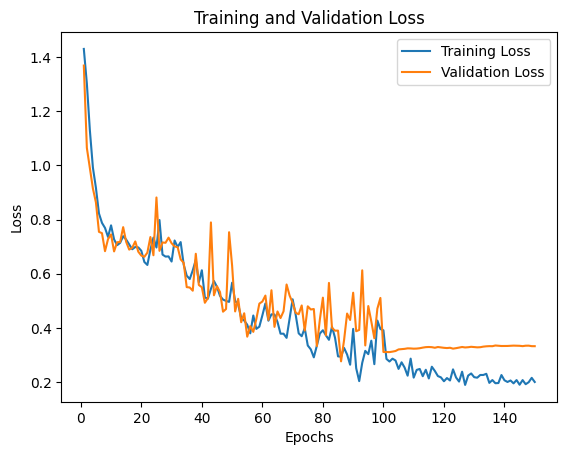

In [ ]:
train_loss = history['loss']
val_loss = history['val_loss']

# 绘制损失曲线
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
class_names=['c','i','s','u']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
predictions = model.predict(x_test)
predictions[0]

7/7 [==============================] - 0s 33ms/step


array([9.9994385e-01, 5.6140409e-05, 4.1090917e-14, 9.0150656e-12],
      dtype=float32)

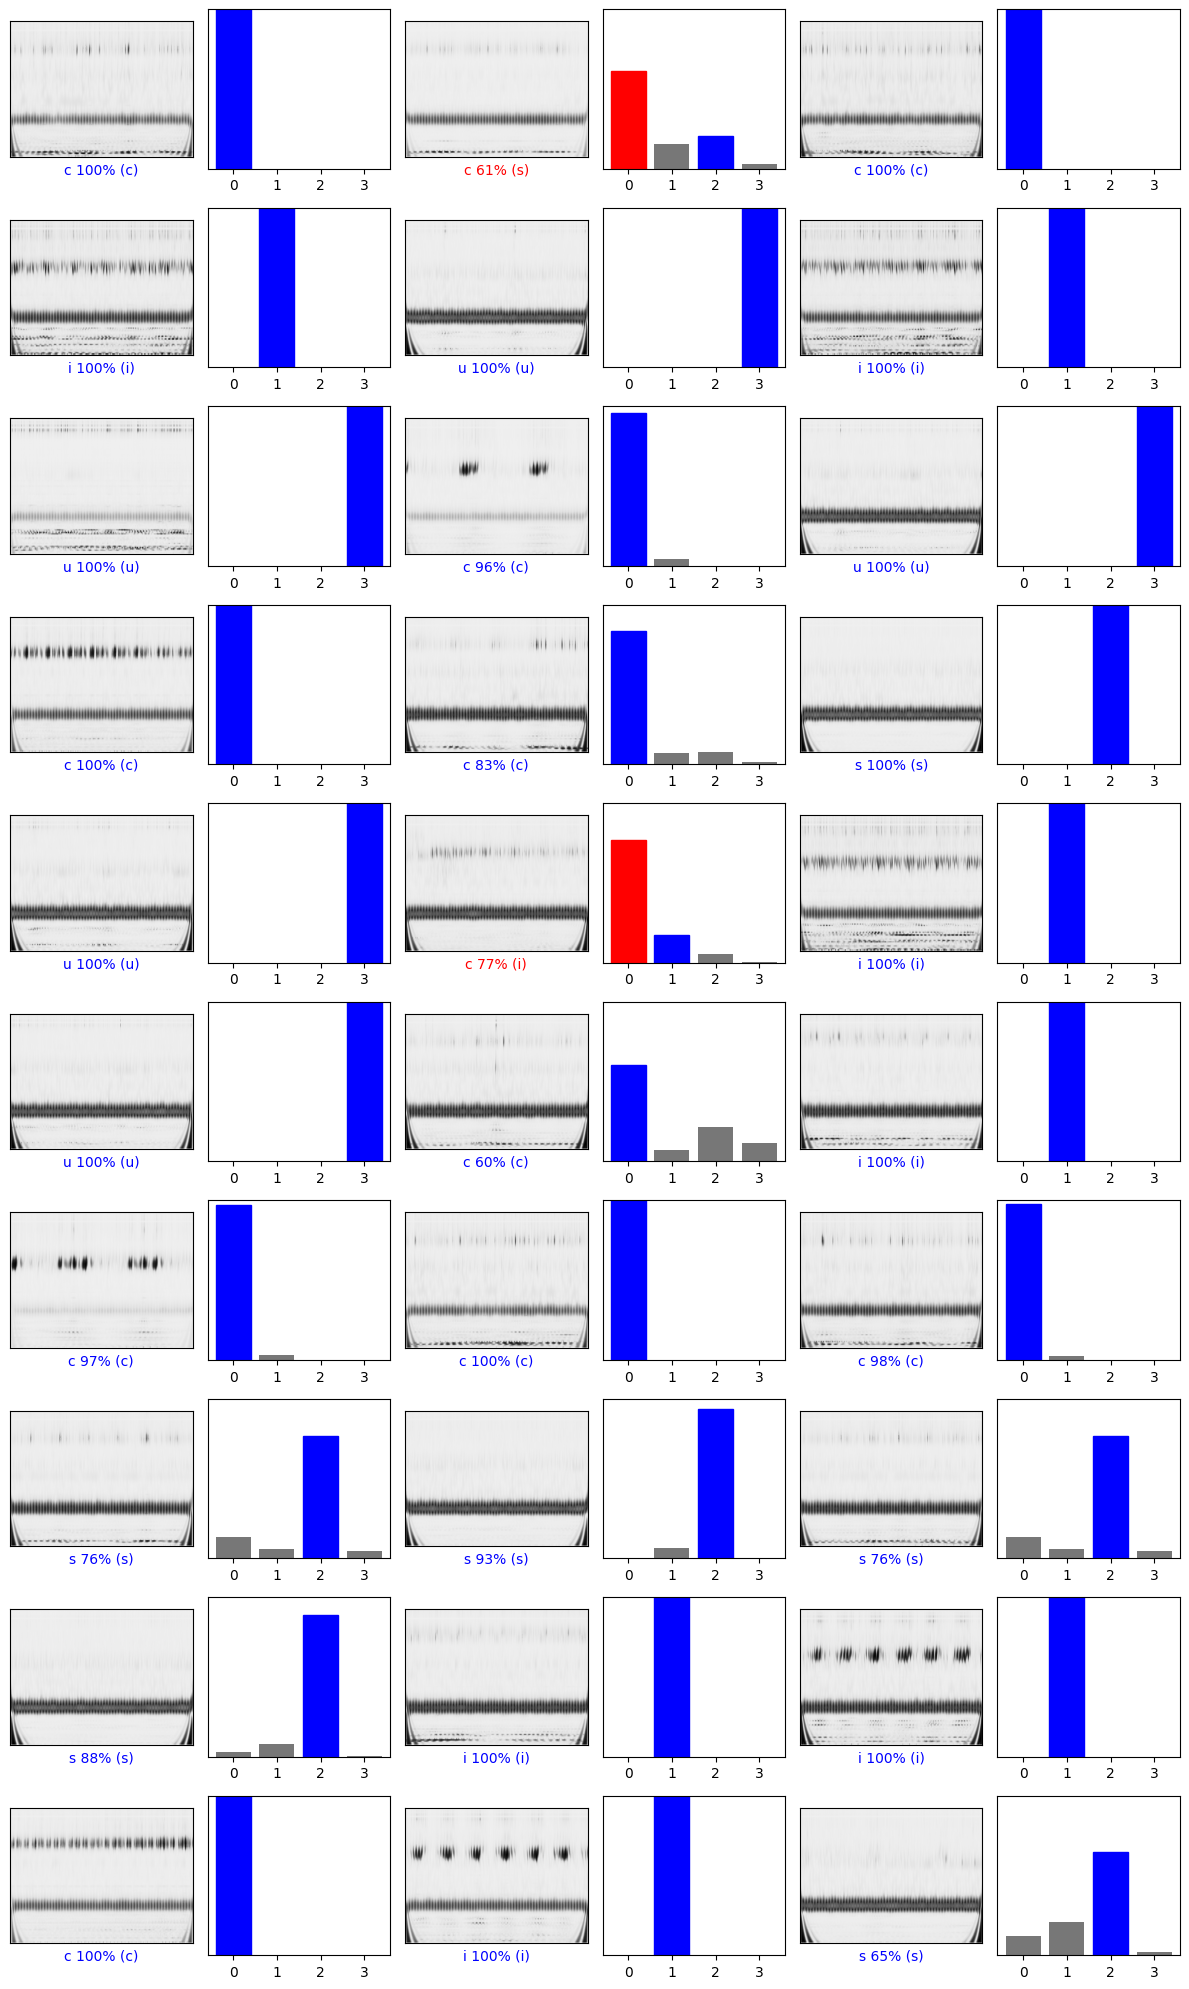

In [ ]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()